In [1]:
import os 
files = os.listdir()
files

['Model1_Overlapping_data.csv',
 'Model2_transaction_data.csv',
 'pr03.ipynb',
 'reservation_data.csv',
 'WhatsApp Image 2024-10-24 at 5.15.01 PM.jpeg',
 'Readme.md',
 'Model1_Overlapping_data1.csv',
 'WhatsApp Image 2024-10-24 at 5.16.08 PM.jpeg']

In [2]:
model1 = 'Model1_Overlapping_data.csv'
model2 = 'Model2_transaction_data.csv'
reserv = 'reservation_data.csv'

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_csv(reserv)
df1 = pd.read_csv(model1)
df2 = pd.read_csv(model2)

In [4]:
# df0.head(10)

In [5]:
# df1.head()


In [6]:
# df2.head()

In [7]:
print('df0:',df0.shape)
print('df1:',df1.shape)
print('df2:',df2.shape)


df0: (300, 6)
df1: (540, 7)
df2: (498, 7)


In [116]:

# reservationids 
# expectedtime
# model1actualtime
# model2actualtime

# expectedpower
# model1actualpower
# model2actualpower

# fault rate = 
# 1 min = 0.3 power 

In [14]:
df0.sort_values(by=['ExpectedTimeMins'], inplace=True)
resrvIds = df0['ResrvId'].to_list()
expectedTimeMins = df0['ExpectedTimeMins'].to_list()
expectedPower = df0['ExpectedPower'].to_list()

data = {}
for i in range(df0.shape[0]):
    data[resrvIds[i]] = expectedTimeMins[i]

In [15]:
model1ActualTimeMins = []
model1ActualPower = []
model2ActualTimeMins = []
model2ActualPower = []

data2 = {}

for rid in resrvIds:
    dict1 = df1[df1['CP_ResrvId']==rid].to_dict()
    model1ActualTimeMins.append(sum(dict1['ActualTimeMins'].values()))
    data2[rid] = sum(dict1['ActualTimeMins'].values())
    model1ActualPower.append(sum(dict1['ActualPower'].values()))

    dict2 = df2[df2['CP_ResrvId']==rid].to_dict()
    model2ActualTimeMins.append(sum(dict2['ActualTimeMins'].values()))
    model2ActualPower.append(sum(dict2['ActualPower'].values()))
    
    

In [16]:
finalData = {}
for key, value in data.items():
    finalData[key] = {}
    finalData[key]['expected'] =  value
    finalData[key]['actual'] = data2[key]

In [17]:
a = []
e = []
for k, v in finalData.items():
    a.append(v['actual'])
    e.append(v['expected'])

In [12]:
# finalData

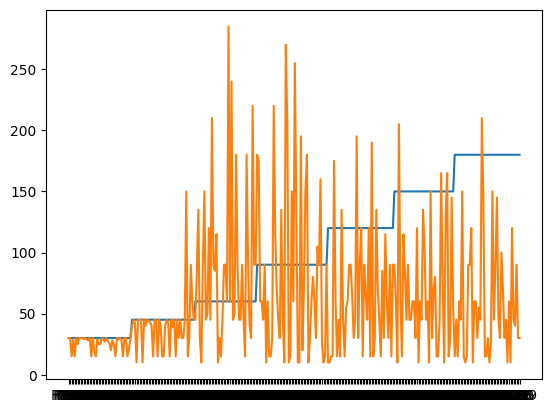

In [18]:
plt.plot(list(finalData.keys()), e)
plt.plot(list(finalData.keys()), a);

In [19]:
finalData

{'R300': {'expected': 30, 'actual': 30},
 'R052': {'expected': 30, 'actual': 30},
 'R047': {'expected': 30, 'actual': 15},
 'R044': {'expected': 30, 'actual': 29},
 'R229': {'expected': 30, 'actual': 15},
 'R062': {'expected': 30, 'actual': 30},
 'R249': {'expected': 30, 'actual': 25},
 'R238': {'expected': 30, 'actual': 30},
 'R071': {'expected': 30, 'actual': 30},
 'R250': {'expected': 30, 'actual': 30},
 'R084': {'expected': 30, 'actual': 29},
 'R070': {'expected': 30, 'actual': 30},
 'R208': {'expected': 30, 'actual': 29},
 'R205': {'expected': 30, 'actual': 28},
 'R195': {'expected': 30, 'actual': 30},
 'R136': {'expected': 30, 'actual': 15},
 'R166': {'expected': 30, 'actual': 30},
 'R172': {'expected': 30, 'actual': 20},
 'R140': {'expected': 30, 'actual': 15},
 'R152': {'expected': 30, 'actual': 29},
 'R134': {'expected': 30, 'actual': 25},
 'R103': {'expected': 30, 'actual': 25},
 'R124': {'expected': 30, 'actual': 30},
 'R125': {'expected': 30, 'actual': 29},
 'R217': {'expec

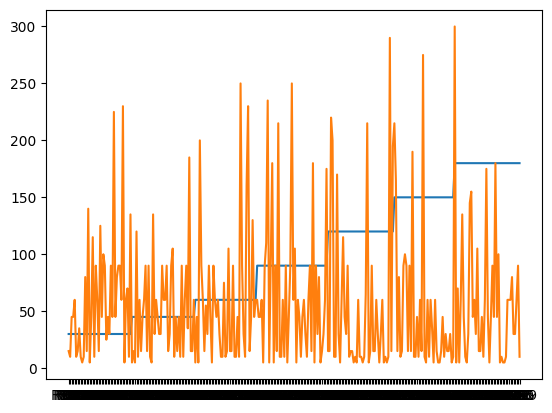

In [122]:
plt.plot(resrvIds, expectedTimeMins)
plt.plot(resrvIds, model2ActualTimeMins);

In [123]:
c = 0
ks = []
for k, v in finalData.items():
    if v['expected']< v['actual']:
        c+=1
        ks.append(k)

In [124]:
c

48

In [128]:
ks

['R286',
 'R058',
 'R233',
 'R151',
 'R102',
 'R111',
 'R180',
 'R129',
 'R292',
 'R164',
 'R011',
 'R015',
 'R273',
 'R265',
 'R221',
 'R077',
 'R098',
 'R253',
 'R059',
 'R049',
 'R046',
 'R056',
 'R041',
 'R281',
 'R054',
 'R051',
 'R169',
 'R167',
 'R110',
 'R226',
 'R225',
 'R038',
 'R243',
 'R252',
 'R254',
 'R085',
 'R199',
 'R158',
 'R014',
 'R157',
 'R163',
 'R188',
 'R207',
 'R258',
 'R183',
 'R083',
 'R073',
 'R271']